# Time Series Analysis

### import required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### install required packages

In [3]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 KB 1.6 MB/s eta 0:00:001.7 MB/s eta 0:00:01


### load the data

In [4]:
# read the data using Date as index column
df = pd.read_csv('../Database/gold_rate.csv', index_col='Date')

### EDA

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0


In [6]:
# get the Close variable along with the Date
# this is a univariate data to be used for analysis
data_close = df['Close']
data_close

Date
2000-08-30     273.899994
2000-08-31     278.299988
2000-09-01     277.000000
2000-09-05     275.799988
2000-09-06     274.200012
                 ...     
2024-08-02    2425.699951
2024-08-05    2401.699951
2024-08-06    2389.100098
2024-08-07    2390.500000
2024-08-08    2467.399902
Name: Close, Length: 6007, dtype: float64

<Axes: xlabel='Date'>

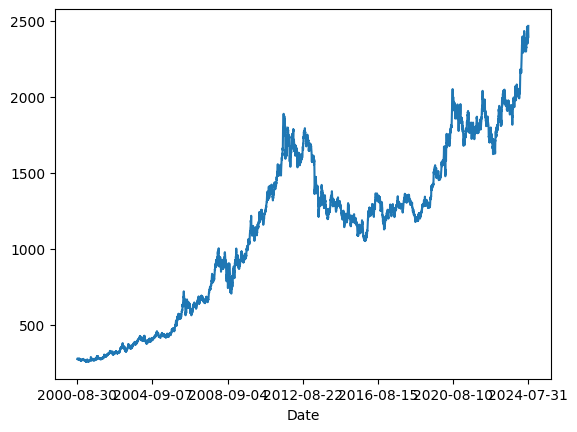

In [7]:
data_close.plot()

<Axes: ylabel='Density'>

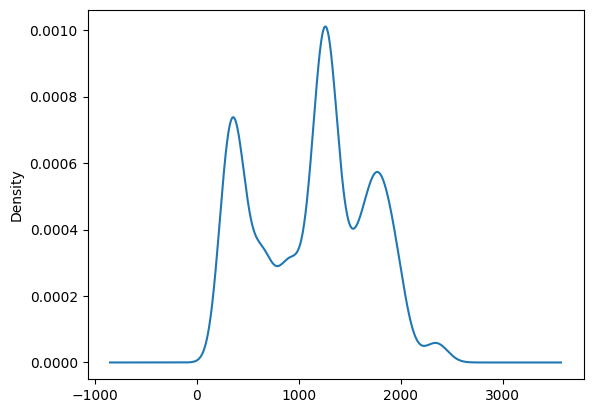

In [8]:
# draw a non-linear trend
data_close.plot(kind='kde')

<Axes: ylabel='Frequency'>

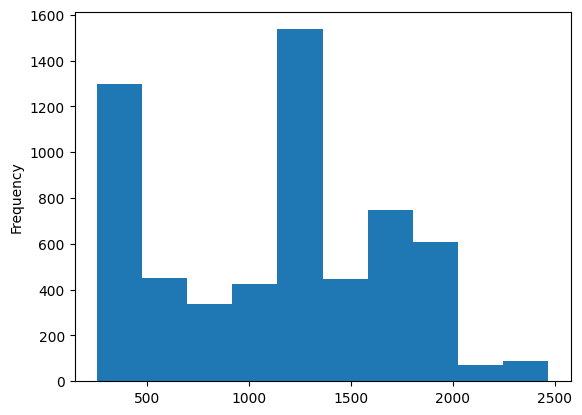

In [9]:
data_close.plot(kind='hist')

<Axes: >

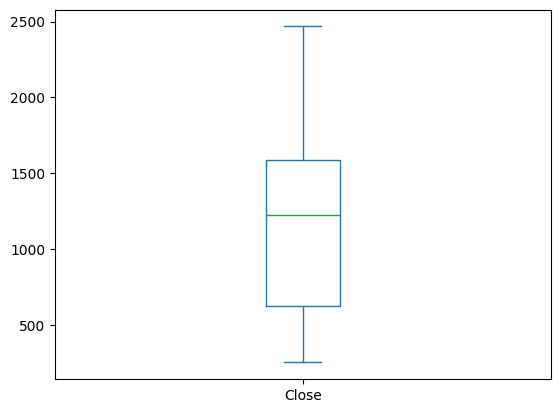

In [10]:
data_close.plot(kind='box')

### understand the time series components

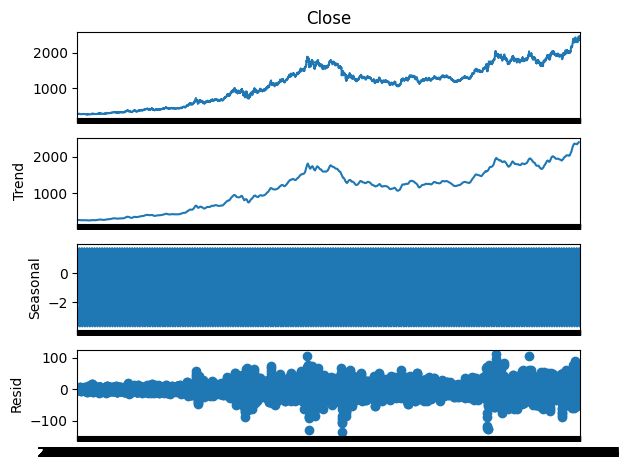

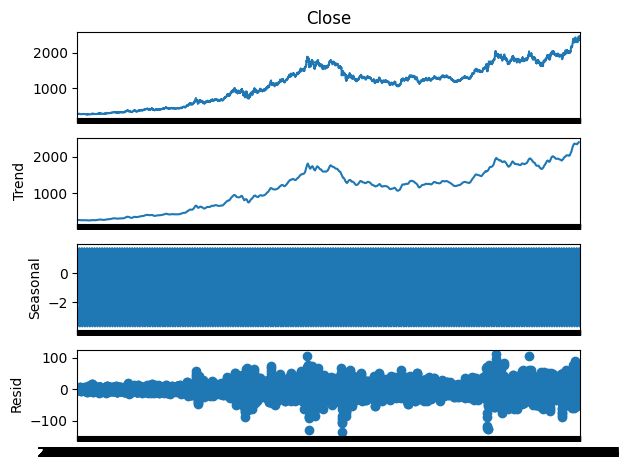

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# get the seasonal decomposision
result = seasonal_decompose(data_close, period=30)
result.plot()

## Forecasting

### naive approach 

- getting the last record

### simple average

In [12]:
data_close.mean()

1136.9490256667514

### moving average

In [13]:
# get the moving average of last two records (window (q) = 2)
data_close.rolling(2).sum()

Date
2000-08-30            NaN
2000-08-31     552.199982
2000-09-01     555.299988
2000-09-05     552.799988
2000-09-06     550.000000
                 ...     
2024-08-02    4860.699951
2024-08-05    4827.399902
2024-08-06    4790.800049
2024-08-07    4779.600098
2024-08-08    4857.899902
Name: Close, Length: 6007, dtype: float64

In [14]:
# get the moving average of last two records (window (q) = 3)
data_close.rolling(3).sum()

Date
2000-08-30            NaN
2000-08-31            NaN
2000-09-01     829.199982
2000-09-05     831.099976
2000-09-06     827.000000
                 ...     
2024-08-02    7287.199951
2024-08-05    7262.399902
2024-08-06    7216.500000
2024-08-07    7181.300049
2024-08-08    7247.000000
Name: Close, Length: 6007, dtype: float64